# Context

* Check if missing values were dropped or interporalated

https://www.kaggle.com/c/1056lab-student-performance-prediction/data

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data_raw = pd.read_csv("data/students_data.csv")

In [3]:
data = data_raw.copy()
print(data.shape)
data.head()

(1044, 35)


,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,1,1,4,5,12,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,3,3,2,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4,4,5,3,5,5,0,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,4,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,4,5,2,12,13,13


In [4]:
data.columns

Index(['ID', 'Subject', 'school', 'sex', 'age', 'address', 'famsize',
       'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

## Check for missingness

In [5]:
data.isnull().sum()
# There are no nulls.  Note that the data has already been pre-processed by the authors.

ID            0
Subject       0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Check for duplicate values

In [6]:
data['ID'].nunique()
data['ID'].value_counts()
#There is one duplicate ID 980773
data[data['ID'] == 980773]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1013,980773,Por,GP,M,16,U,LE3,T,2,2,other,other,reputation,mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,4,2,4,5,2,10,10,10
1014,980773,Por,GP,F,17,R,GT3,T,2,2,other,other,reputation,mother,1,1,0,no,yes,no,no,yes,yes,yes,no,5,3,2,1,2,3,21,13,13,13


In [7]:
#The duplicates appear to be different students so we will change the ID of the second one
data.loc[data.index == 1014,'ID'] = 999999
data['ID'].nunique()

1044

## Inspect distributions of features

In [8]:
# Number of students studying Portuguese and Math
print(data['Subject'].value_counts())
# Number of students attending the two study schools
print(data['school'].value_counts())
# Number of male and female students
print(data['sex'].value_counts())
# Number of students living in rural or urban settings
print(data['address'].value_counts())
# Number of students with family size greater than or less than 3
print(data['famsize'].value_counts())
# Number of students wtih parents togethor or apart
print(data['Pstatus'].value_counts())

Por     649
Math    395
Name: Subject, dtype: int64
GP    772
MS    272
Name: school, dtype: int64
F    591
M    453
Name: sex, dtype: int64
U    759
R    285
Name: address, dtype: int64
GT3    738
LE3    306
Name: famsize, dtype: int64
T    923
A    121
Name: Pstatus, dtype: int64


c:\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
c:\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `

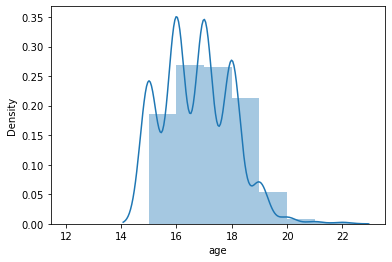

In [9]:
# Number of male and female students
sns.distplot(data.age,bins=np.arange(12,24))

In [10]:
# There are some unusually old students
# They appear to be poor-performing, so perhaps they were held back.
data[data['age']>19]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
95,173638,Por,GP,M,21,R,LE3,T,1,1,at_home,other,course,other,2,2,2,no,yes,no,yes,yes,no,yes,yes,5,3,3,5,2,4,21,9,10,10
284,342577,Math,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
340,390717,Por,GP,M,20,U,GT3,A,3,2,services,other,course,other,1,1,2,no,no,no,yes,yes,yes,no,no,5,5,3,1,1,5,0,14,15,15
369,417336,Math,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
570,586846,Math,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,5,5,1,16,6,8,8
653,658066,Por,MS,F,20,U,GT3,T,3,3,at_home,services,other,mother,2,2,1,no,no,no,yes,yes,yes,yes,yes,3,3,4,2,4,3,8,11,9,10
680,676866,Por,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,5,5,1,12,7,8,5
742,736856,Por,MS,M,20,R,GT3,T,1,1,other,other,course,other,2,1,1,no,yes,no,no,yes,no,yes,yes,4,4,3,2,4,4,12,8,11,10
759,746457,Math,GP,M,20,U,GT3,A,3,2,services,other,course,other,1,1,0,no,no,no,yes,yes,yes,no,no,5,5,3,1,1,5,0,17,18,18
810,800561,Por,GP,F,20,U,GT3,T,1,0,other,other,reputation,mother,2,1,1,yes,no,no,no,yes,yes,yes,yes,5,3,1,1,1,5,5,8,10,10


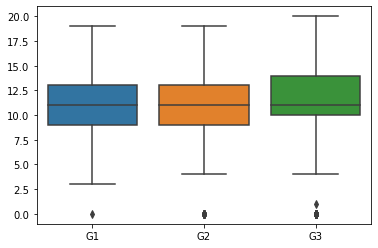

In [11]:
# Inspect information about the students academic performacne
# Check the ranges of the values
sns.boxplot(data=data[['G1','G2','G3']])

In [12]:
data['failures'].value_counts()

0    861
1    120
2     33
3     30
Name: failures, dtype: int64

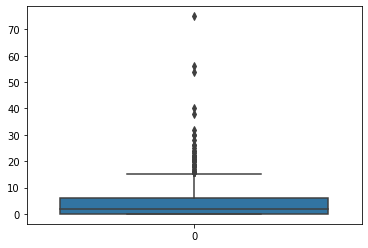

In [13]:
sns.boxplot(data=data['absences'])

In [14]:
# Inspect the outlier values of absences
data[data['absences']>40]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
234,292475,Math,GP,F,16,U,GT3,T,3,3,other,services,home,mother,1,2,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,3,2,4,5,54,11,12,11
353,396440,Math,GP,F,17,U,LE3,T,3,3,other,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,yes,5,3,3,2,3,1,56,9,9,8
990,962706,Math,GP,F,18,R,GT3,A,3,2,other,services,home,mother,2,2,0,no,no,no,no,no,no,yes,yes,4,1,1,1,1,5,75,10,9,9


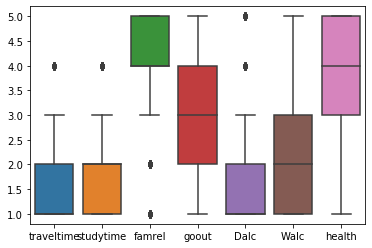

In [15]:
sns.boxplot(data=data[['traveltime','studytime','famrel','goout','Dalc','Walc','health']])

In [16]:
print(data.activities.value_counts())
print(data.nursery.value_counts())
print(data.higher.value_counts())
print(data.internet.value_counts())
print(data.romantic.value_counts())

no     528
yes    516
Name: activities, dtype: int64
yes    835
no     209
Name: nursery, dtype: int64
yes    955
no      89
Name: higher, dtype: int64
yes    827
no     217
Name: internet, dtype: int64
no     673
yes    371
Name: romantic, dtype: int64


In [17]:
# Check parents
print(data.famsize.value_counts())
print(data.Pstatus.value_counts())
print(data.guardian.value_counts())

GT3    738
LE3    306
Name: famsize, dtype: int64
T    923
A    121
Name: Pstatus, dtype: int64
mother    728
father    243
other      73
Name: guardian, dtype: int64


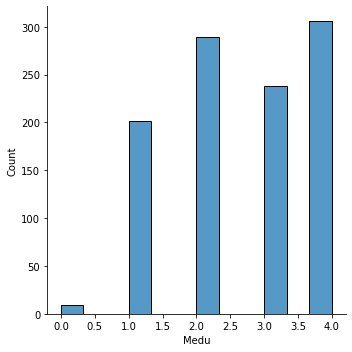

In [18]:
sns.displot(data.Medu)

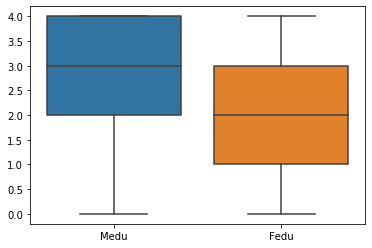

In [19]:
sns.boxplot(data=data[['Medu','Fedu']])

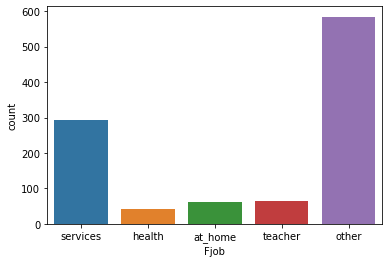

In [20]:
sns.countplot(x='Fjob',data=data,order=['services','health','at_home','teacher','other'])

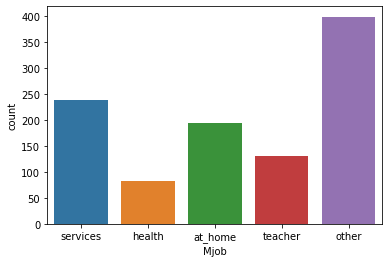

In [21]:
sns.countplot(x='Mjob',data=data,order=['services','health','at_home','teacher','other'])

In [22]:
# Economic support
print(data.schoolsup.value_counts())
print(data.famsup.value_counts())
print(data.paid.value_counts())

no     925
yes    119
Name: schoolsup, dtype: int64
yes    640
no     404
Name: famsup, dtype: int64
no     824
yes    220
Name: paid, dtype: int64


## Sanity checks

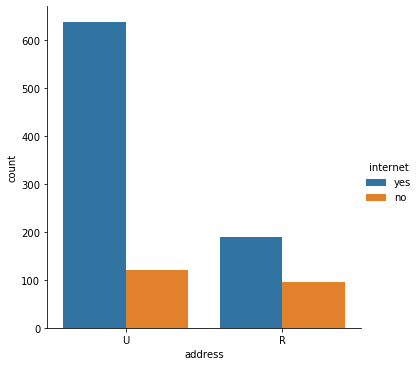

In [23]:
# Are urban students more connected to the internet?
sns.catplot(x="address", hue="internet", kind="count", data=data)

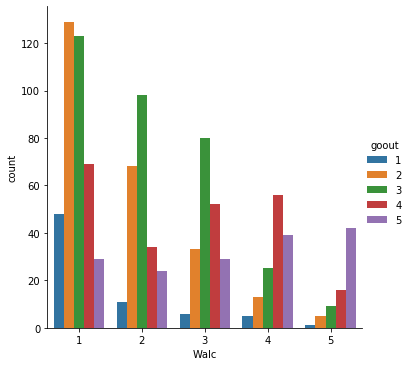

In [24]:
# Do students who go out more drink more alcohol?
sns.catplot(x="Walc", hue="goout", kind="count", data=data)

In [25]:
# Is weekly alcohol consumption more than daily?
data[data['Dalc'] > data['Walc']]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
71,156109,Por,MS,M,18,R,GT3,T,4,2,other,other,home,father,2,1,1,no,no,yes,no,yes,yes,no,no,5,4,3,4,3,3,0,7,7,0
95,173638,Por,GP,M,21,R,LE3,T,1,1,at_home,other,course,other,2,2,2,no,yes,no,yes,yes,no,yes,yes,5,3,3,5,2,4,21,9,10,10
248,304732,Por,GP,M,16,U,GT3,T,4,4,teacher,teacher,course,mother,1,1,0,no,yes,no,no,yes,no,yes,yes,3,3,2,2,1,5,16,9,9,8
278,337797,Por,MS,F,18,R,GT3,T,4,4,other,teacher,other,father,3,2,0,no,yes,no,no,no,yes,yes,yes,3,2,2,4,2,5,0,7,5,0
309,360184,Por,MS,F,16,R,GT3,T,1,1,at_home,other,other,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,4,2,2,4,3,2,0,13,12,14
365,411391,Por,MS,M,16,R,LE3,T,4,1,other,at_home,other,father,1,1,0,no,no,no,no,yes,yes,yes,no,4,1,2,2,1,2,0,10,11,11
412,451337,Math,MS,F,18,R,GT3,T,4,4,other,teacher,other,father,3,2,0,no,yes,yes,no,no,yes,yes,yes,3,2,2,4,2,5,10,14,12,11
471,500505,Por,MS,F,17,U,GT3,T,4,2,teacher,other,course,father,2,4,0,no,no,no,no,yes,yes,yes,yes,4,2,3,3,1,5,0,18,18,18
486,512590,Por,GP,F,19,U,GT3,T,1,1,other,other,course,other,3,3,0,no,no,no,yes,yes,no,no,yes,1,5,5,4,3,5,12,10,10,11
547,572426,Por,MS,F,16,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,no,yes,5,4,3,2,1,2,0,13,14,15


In [26]:
# Correlations between G1, G2, and G3
corr = data[['G1','G2','G3']].corr()
corr
#sns.heatmap(corr)

,G1,G2,G3
G1,1.000000,0.858739,0.809142
G2,0.858739,1.000000,0.910743
G3,0.809142,0.910743,1.000000


# Transformations

In [27]:
X = pd.DataFrame()

#Continous variables
#X["age"] = data["age"]
X["absences"] = data["absences"]
X["failures"] = data["failures"]
X["grade1"] = data["G1"]
#X["grade2"] = data["G2"]

#Continous and ordinal variables
X["traveltime"] = data["traveltime"]
X["studytime"] = data["studytime"]
X["famrel"] = data["famrel"]
X["freetime"] = data["freetime"]
X["goout"] = data["goout"]
X["Dalc"] = data["Dalc"]
X["Walc"] = data["Walc"]
X["health"] = data["health"]

#Binary variables (yes / no)
X["activities"] = data["activities"].apply(lambda x: 1 if x == "yes" else 0 )
X["nursery"] = data["nursery"].apply(lambda x: 1 if x == "yes" else 0 )
X["internet"] = data["internet"].apply(lambda x: 1 if x == "yes" else 0 )
X["romantic"] = data["romantic"].apply(lambda x: 1 if x == "yes" else 0 )

#Binary variables (category)
#X["subject_por"] = data["subject"].apply(lambda x: 1 if x == "Por" else 0 )
X["school_gp"] = data["school"].apply(lambda x: 1 if x == "GP" else 0 )
X["address_urban"] = data["address"].apply(lambda x: 1 if x == "U" else 0 )
X["famsize_gt3"] = data["famsize"].apply(lambda x: 1 if x == "GT3" else 0 )
X["Pstatus_togethor"] = data["Pstatus"].apply(lambda x: 1 if x == "T" else 0 )
X["sex_female"] = data["sex"].apply(lambda x: 1 if x == "F" else 0 )

#One-hot encoded variables:

mjob_one_hot = pd.get_dummies(data['Mjob'],drop_first=True)
X = pd.merge(X,mjob_one_hot.add_suffix('_mjob'), how='left',left_index=True, right_index=True)
fjob_one_hot = pd.get_dummies(data['Fjob'],drop_first=True)
X = pd.merge(X,fjob_one_hot.add_suffix('_fjob'), how='left',left_index=True, right_index=True)
reason_one_hot = pd.get_dummies(data['reason'],drop_first=True)
X = pd.merge(X,reason_one_hot.add_suffix('_reason'), how='left',left_index=True, right_index=True)
guardian_one_hot = pd.get_dummies(data['guardian'],drop_first=True)
X = pd.merge(X,guardian_one_hot.add_suffix('_guardian'), how='left',left_index=True, right_index=True)

In [28]:
print(X.shape)
X.head()

(1044, 33)


,absences,failures,grade1,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,activities,nursery,internet,romantic,school_gp,address_urban,famsize_gt3,Pstatus_togethor,sex_female,health_mjob,other_mjob,services_mjob,teacher_mjob,health_fjob,other_fjob,services_fjob,teacher_fjob,home_reason,other_reason,reputation_reason,mother_guardian,other_guardian
0,12,0,15,1,1,3,2,1,1,4,5,0,1,1,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
1,2,0,17,1,2,5,3,4,1,3,3,1,0,1,0,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0
2,0,2,9,2,1,4,4,5,3,5,5,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,4,0,14,2,2,4,4,3,1,1,3,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,2,0,12,2,1,4,3,2,1,4,5,0,1,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0


In [29]:
# Code target
y = data["G3"].apply(lambda x: 1 if x < 10 else 0 )
print(y.shape)
print(y.value_counts())

(1044,)
0    814
1    230
Name: G3, dtype: int64


In [30]:
# Save the csvs
X.to_csv("matrices/por_X.csv")
y.to_csv("matrices/por_y.csv")

# Correlations

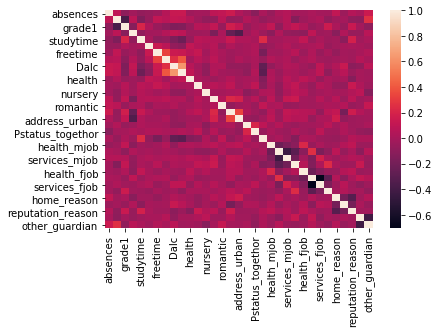

In [31]:
# Feature correlation
corr = X.corr()
# Heatmap
sns.heatmap(corr)

In [32]:
temp = X
temp["y"] = data["G3"].apply(lambda x: 1 if x < 10 else 0 )

cols = list(X.columns.values)
cols.remove("y")
cols.insert(0,"y")

temp = temp[cols]
# Correlation with target
corr = temp.corr()